# Basic example using the MOSM, Conv, CSM and SM-LMC kernels
Here we show the basic usage of the toolkit using a contrived example dataset of three sinusoidal signals. The three sinusses are each put in a channel and have the same frequency but differ in phase. The observations are randomly picked in the range of [0,4], where the first channel will have the second half of the observations removed. Each of the kernels is being evaluated on the same dataset so that we can easily compare the results. Finally, a comparison is made between the different kernels and the errors they obtain.

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

# TODO: remove when done:
%reload_ext autoreload
%autoreload 2

## Generate dataset

In [2]:
data = mogptk.Data()

data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')

data.remove_range('A', start=2.0, end=None)

## MOSM

In [ ]:
model_mosm = mogptk.MOSM(data, Q=3)
model_mosm.init_params()
display(model_mosm.get_params())

In [ ]:
model_mosm.train()
display(model_mosm.get_params())

In [ ]:
model_mosm.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_mosm.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_mosm.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_mosm.predict()

mogptk.plot(model_mosm)

## CSM

In [ ]:
model_csm = mogptk.CSM(data, Q=3)
model_csm.init_params()
display(model_csm.get_params())

In [ ]:
model_csm.train()
display(model_csm.get_params())

In [ ]:
model_csm.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_csm.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_csm.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_csm.predict()

mogptk.plot(model_csm)

## CG

In [9]:
model_cg = mogptk.CG(data, Q=3)
#model_cg.init_params()
display(model_cg.get_params())

[{'constant': array([0.57283625, 0.30175191, 0.35049237]),
  'variance': array([[0., 0., 0.]])},
 {'constant': array([0.68145367, 0.86402112, 0.91505343]),
  'variance': array([[0., 0., 0.]])},
 {'constant': array([0.10630681, 0.315243  , 0.29511636]),
  'variance': array([[0., 0., 0.]])}]

In [10]:
model_cg.train(method='BFGS', export_graph=True)
display(model_cg.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 64.062546
  Number of iterations: 52
  Number of functions evaluations: 55


[{'constant': array([0.00041045, 0.22957529, 0.18163678]),
  'variance': array([[1.e-06, 1.e-06, 1.e-06]])},
 {'constant': array([0.00385369, 1.95604529, 1.5475927 ]),
  'variance': array([[1.e-06, 1.e-06, 1.e-06]])},
 {'constant': array([0.00123103, 0.62361999, 0.49339789]),
  'variance': array([[1.e-06, 1.e-06, 1.e-06]])}]

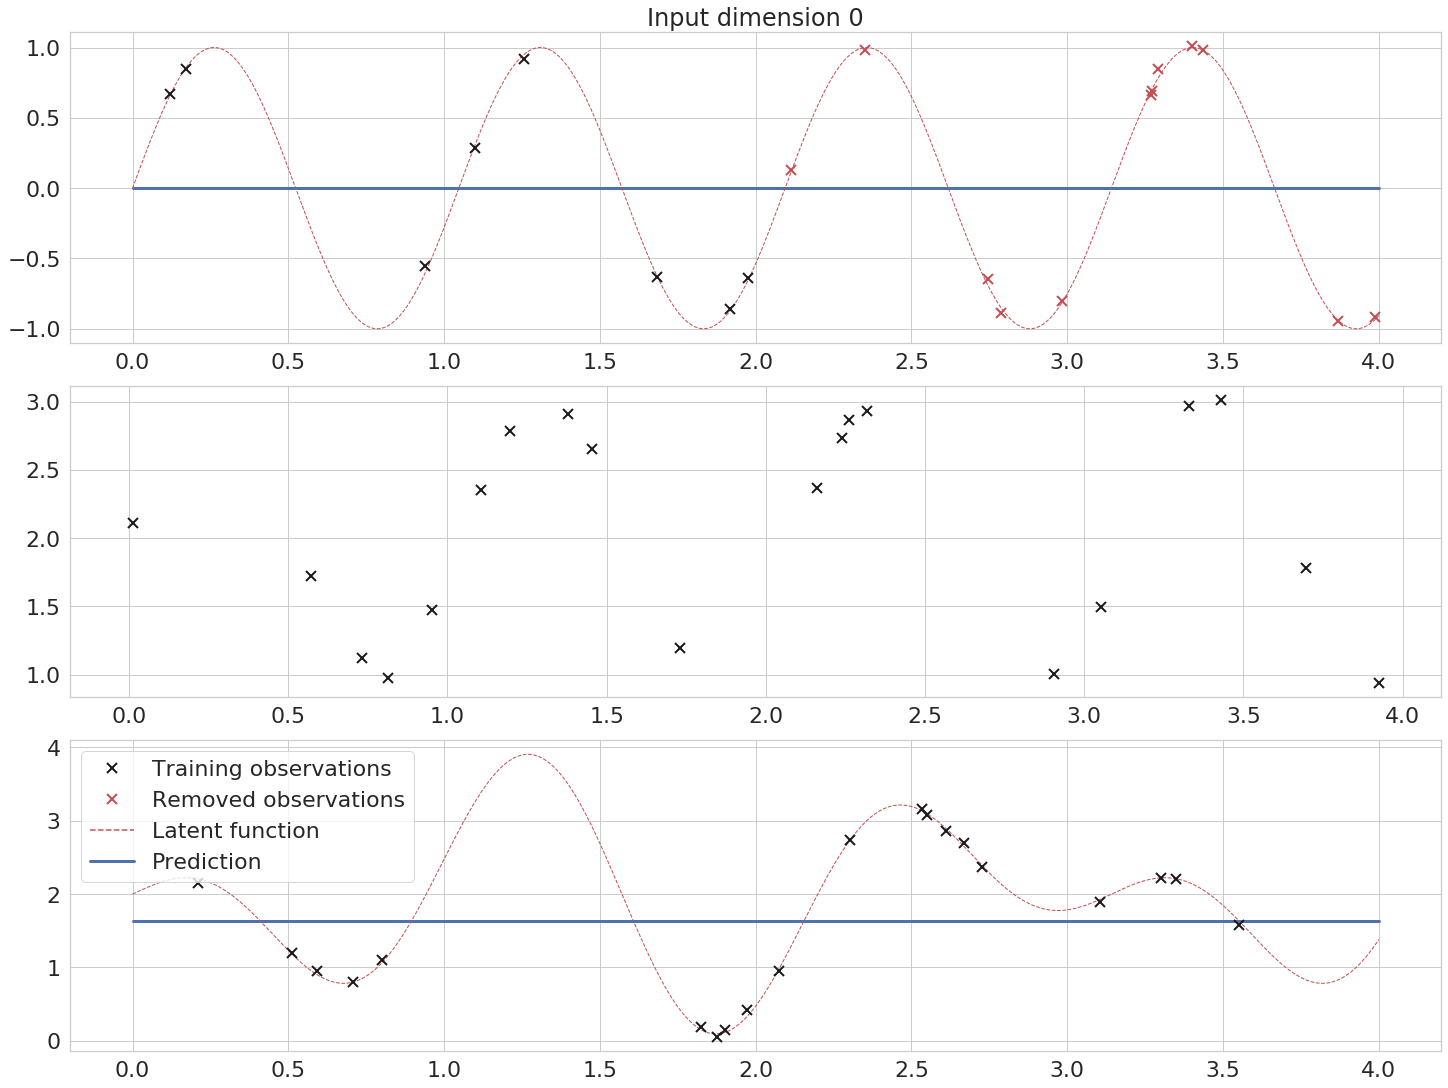

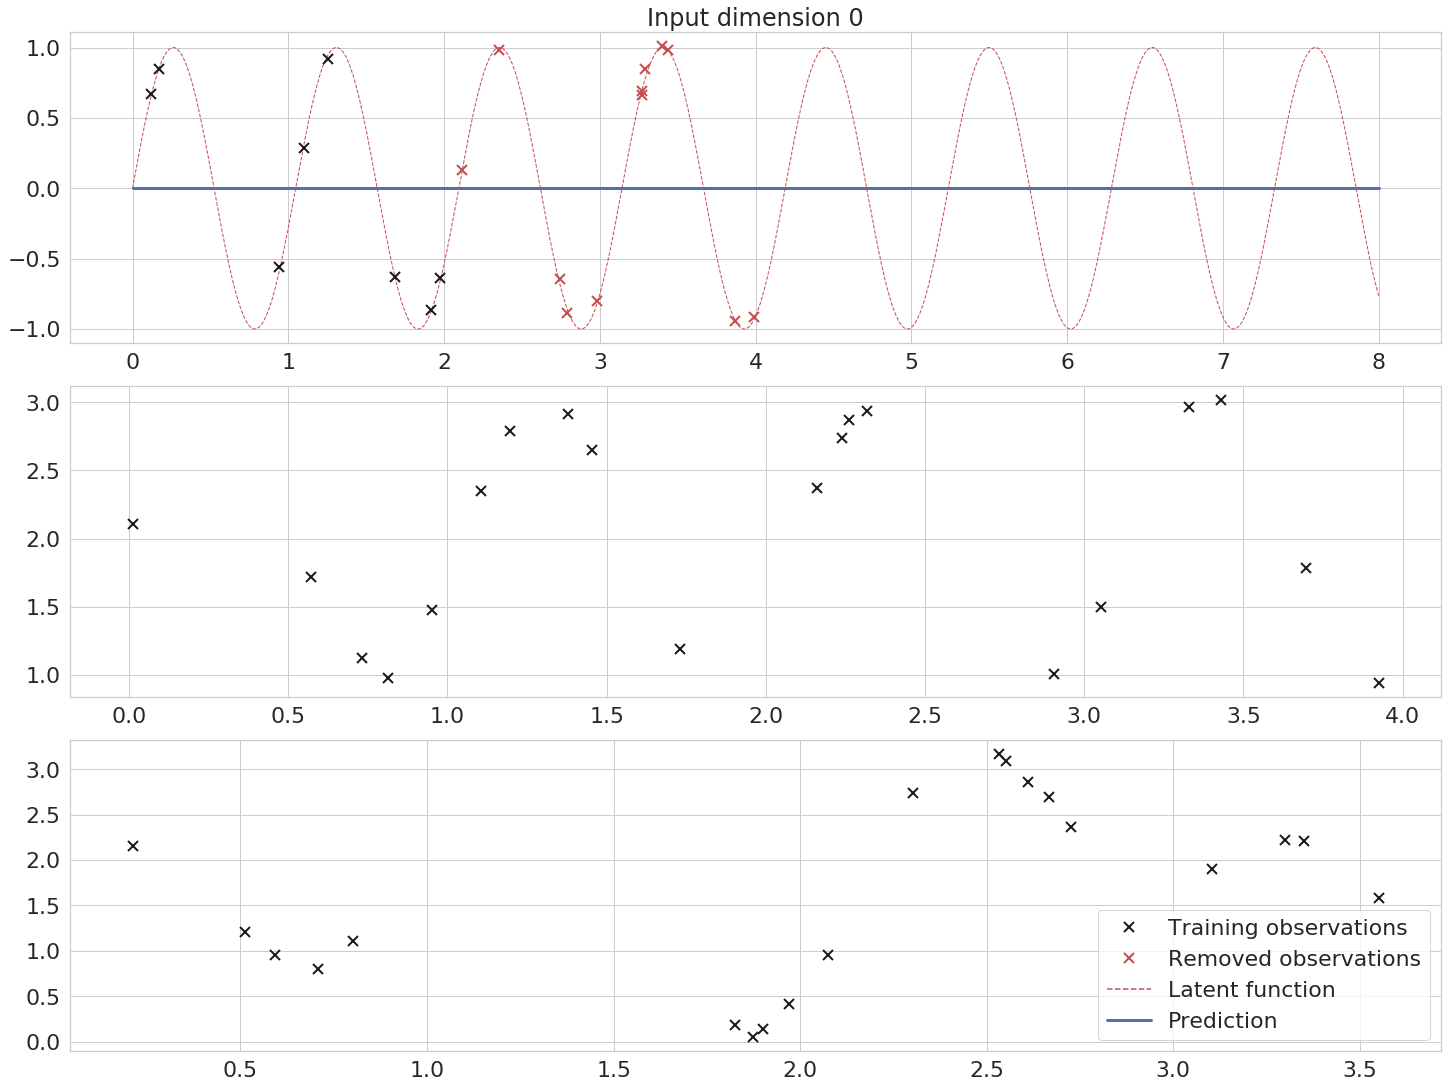

In [22]:
pred_cg1 = mogptk.Prediction(model_cg)
pred_cg1.set_range(channel='A', start=0, end=4, step=0.02)
pred_cg1.set_range(channel='C', start=0, end=4, step=0.02)

pred_cg2 = mogptk.Prediction(model_cg)
pred_cg2.set_range(channel='A', start=0, end=8, step=0.02)

pred_cg1.predict()
pred_cg2.predict()

pred_cg1.plot()
pred_cg2.plot()

## SM-LMC

In [ ]:
model_smlmc = mogptk.SM_LMC(data, Q=3)
model_smlmc.init_params(plot=True)
display(model_smlmc.get_params())

In [ ]:
model_smlmc.train()
display(model_smlmc.get_params())

In [ ]:
model_smlmc.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_smlmc.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_smlmc.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_smlmc.predict()

mogptk.plot(model_smlmc)

## Error estimation

In [ ]:
mogptk.errors(model_mosm, model_csm, model_smlmc, model_cg, print=True)